# Apple App Store Veri Analizi

Bu not defterinde, Apple App Store'dan alınan uygulama verilerini analiz edeceğiz. Amacımız, verileri temizlemek, keşifsel veri analizi (EDA) yapmak ve uygulamaların özellikleri, fiyatları ve kullanıcı puanları arasındaki ilişkileri anlamaktır.

### 1. Kütüphanelerin Yüklenmesi

Analize başlamadan önce, veri işleme (`pandas`), sayısal işlemler (`numpy`) ve görselleştirme (`matplotlib`, `seaborn`) için gerekli olan temel Python kütüphanelerini yükleyelim.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Görselleştirme için daha iyi bir stil ayarlayalım
sns.set_style('whitegrid')

### 2. Verinin Yüklenmesi ve İlk Bakış

Şimdi `AppleStore.csv` dosyasını bir pandas DataFrame'ine yükleyeceğiz. Veri setinin yapısını anlamak için ilk olarak `.head()` fonksiyonu ile ilk birkaç satırına göz atacağız. Bu, sütun adlarını ve veri formatını hızlıca görmemizi sağlar.

In [2]:
df = pd.read_csv('AppleStore.csv')
df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


### 3. Veri Temizleme ve Ön İşleme

Analize başlamadan önce verinin temiz ve düzenli olduğundan emin olmalıyız.

#### Eksik Verilerin Kontrolü

`.isnull().sum()` kullanarak her sütunda kaç tane eksik (boş) değer olduğunu kontrol edelim. Eksik veriler, analizimizin doğruluğunu etkileyebilir.

In [3]:
df.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

#### Veri Tiplerinin Kontrolü

`.info()` metodu, her sütunun veri tipini (örneğin, sayısal, metin, tarih) ve bellekte ne kadar yer kapladığını gösterir. Bu, sayısal olması gereken sütunların yanlışlıkla metin olarak okunup okunmadığını anlamak için önemlidir.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


#### Gereksiz Sütunların Kaldırılması

Analizimiz için doğrudan anlam ifade etmeyen bazı sütunları veri setinden kaldıralım. Örneğin, baştaki isimsiz sütun (`Unnamed: 0`), `id`, `track_name` ve `ver` gibi sütunlar bu analizde daha az öneme sahip. Bu, veri setimizi daha yönetilebilir hale getirir.

In [5]:
df = df.drop(columns=['Unnamed: 0', 'id', 'track_name', 'currency', 'ver'])
print("Gereksiz sütunlar kaldırıldıktan sonraki ilk 5 satır:")
df.head()

Gereksiz sütunlar kaldırıldıktan sonraki ilk 5 satır:


,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,100788224,3.99,21292,26,4.0,4.5,4+,Games,38,5,10,1
1,158578688,0.00,161065,26,4.0,3.5,4+,Productivity,37,5,23,1
2,100524032,0.00,188583,2822,3.5,4.5,4+,Weather,37,5,3,1
3,128512000,0.00,262241,649,4.0,4.5,12+,Shopping,37,5,9,1
4,92774400,0.00,985920,5320,4.5,5.0,4+,Reference,37,5,45,1


### 4. Keşifsel Veri Analizi (EDA)

Veriyi temizledikten sonra, temel istatistikleri ve görselleştirmeleri kullanarak veriyi daha derinlemesine incelemeye başlayabiliriz.

In [6]:
# Veri setindeki toplam uygulama sayısını bulalım
print(f"Toplam incelenen uygulama sayısı: {len(df)}")

Toplam incelenen uygulama sayısı: 7197


In [7]:
# Uygulama türlerine göre uygulama sayılarını bir tablo olarak gösterelim (En popüler 10)
print(df['prime_genre'].value_counts().head(10))

prime_genre
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Name: count, dtype: int64


#### Uygulama Türlerinin (Genre) Dağılımı

App Store'daki en yaygın uygulama kategorilerinin hangileri olduğunu merak ediyor musunuz? `prime_genre` sütununu kullanarak her türdeki uygulama sayısını sayalım ve en popüler 10 türü bir bar grafiği ile görselleştirelim.

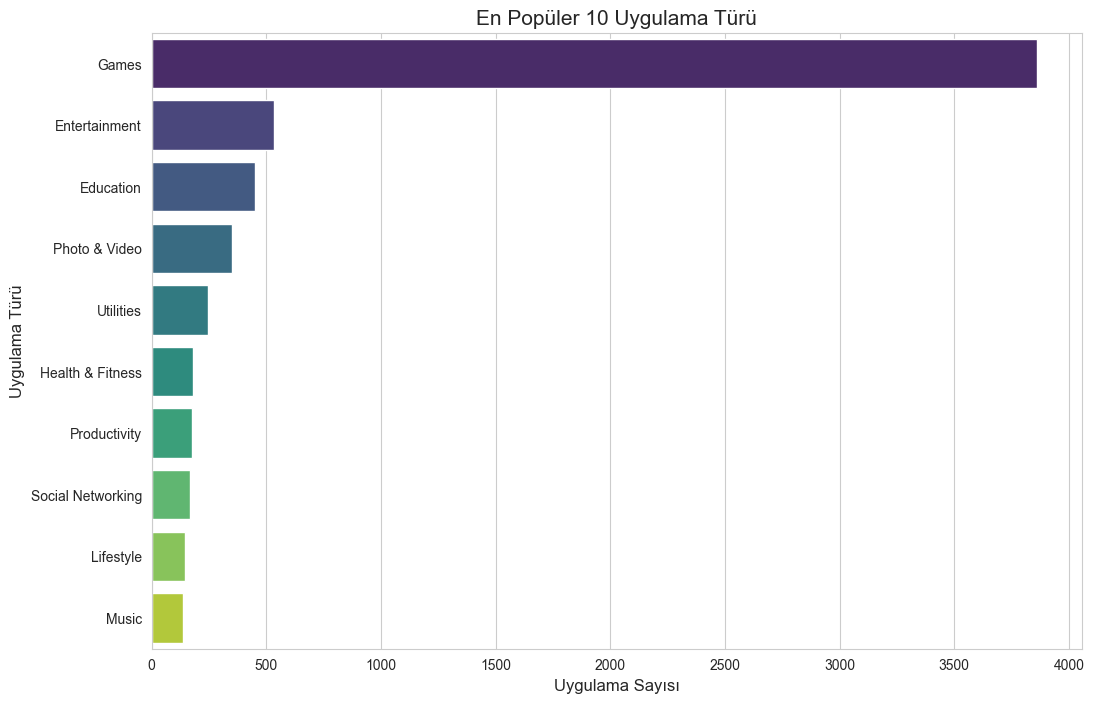

In [8]:
# Her türdeki uygulama sayısını sayalım
genre_counts = df['prime_genre'].value_counts().head(10)

# En popüler 10 türü görselleştirelim
plt.figure(figsize=(12, 8))
# FutureWarning'u gidermek için `hue` parametresi eklendi ve `legend=False` olarak ayarlandı
sns.barplot(y=genre_counts.index, x=genre_counts.values, hue=genre_counts.index, palette='viridis', legend=False)
plt.title('En Popüler 10 Uygulama Türü', fontsize=15)
plt.xlabel('Uygulama Sayısı', fontsize=12)
plt.ylabel('Uygulama Türü', fontsize=12)
plt.show()

Fiyat Tipine Göre Ortalama Kullanıcı Puanları:
price_type
Ücretli     3.720949
Ücretsiz    3.376726
Name: user_rating, dtype: float64


/var/folders/m9/3_7xyc296gj2j1yfqc40q7kw0000gn/T/ipykernel_5137/416318312.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_type', y='user_rating', data=df, palette='coolwarm')


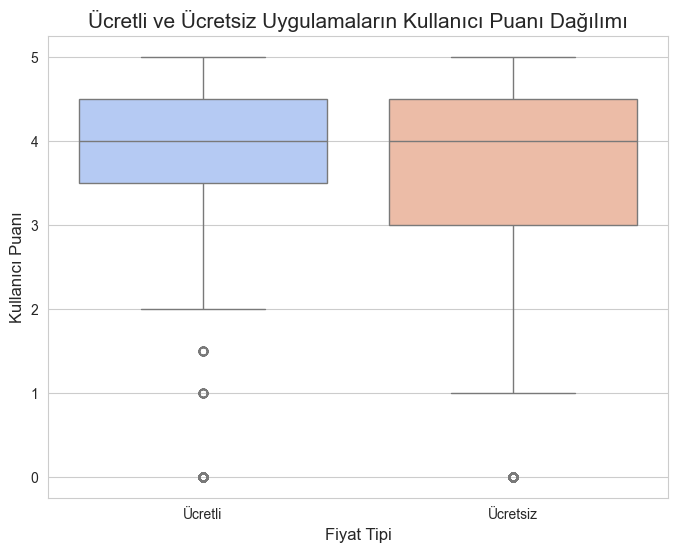

In [9]:
# Fiyata göre uygulamaları 'Ücretsiz' veya 'Ücretli' olarak yeni bir sütunda kategorize edelim
df['price_type'] = np.where(df['price'] == 0, 'Ücretsiz', 'Ücretli')

# Her iki kategori için ortalama kullanıcı puanlarını hesaplayıp yazdıralım
print("Fiyat Tipine Göre Ortalama Kullanıcı Puanları:")
print(df.groupby('price_type')['user_rating'].mean())

# Kutu grafiği ile puan dağılımlarını görselleştirelim
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_type', y='user_rating', data=df, palette='coolwarm')
plt.title('Ücretli ve Ücretsiz Uygulamaların Kullanıcı Puanı Dağılımı', fontsize=15)
plt.xlabel('Fiyat Tipi', fontsize=12)
plt.ylabel('Kullanıcı Puanı', fontsize=12)
plt.show()

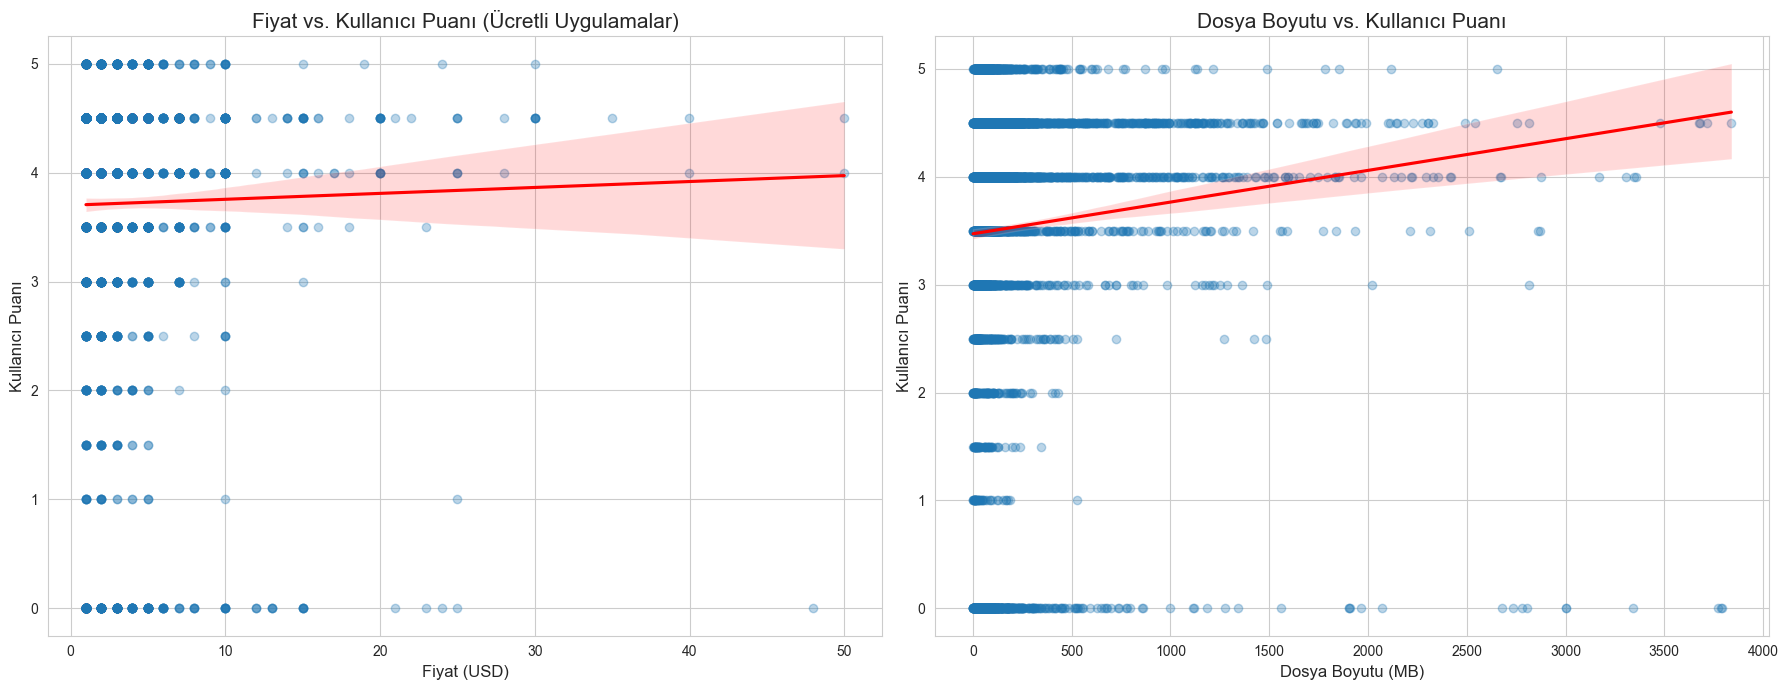

In [10]:
# Dosya boyutunu daha okunabilir olması için Megabyte'a (MB) çevirelim
df['size_mb'] = df['size_bytes'] / (1024*1024)

# Grafiklerin boyutunu ve yerleşimini ayarlayalım
plt.figure(figsize=(18, 7))

# 1. Grafik: Fiyat vs. Kullanıcı Puanı
# Grafiği daha okunabilir kılmak için sadece ücretli ve fiyatı 50'den az olan uygulamaları görselleştirelim
plt.subplot(1, 2, 1)
sns.regplot(x='price', y='user_rating', data=df[(df['price'] > 0) & (df['price'] < 50)], 
            scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Fiyat vs. Kullanıcı Puanı (Ücretli Uygulamalar)', fontsize=15)
plt.xlabel('Fiyat (USD)', fontsize=12)
plt.ylabel('Kullanıcı Puanı', fontsize=12)

# 2. Grafik: Dosya Boyutu vs. Kullanıcı Puanı
plt.subplot(1, 2, 2)
sns.regplot(x='size_mb', y='user_rating', data=df, 
            scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Dosya Boyutu vs. Kullanıcı Puanı', fontsize=15)
plt.xlabel('Dosya Boyutu (MB)', fontsize=12)
plt.ylabel('Kullanıcı Puanı', fontsize=12)

plt.tight_layout()
plt.show()

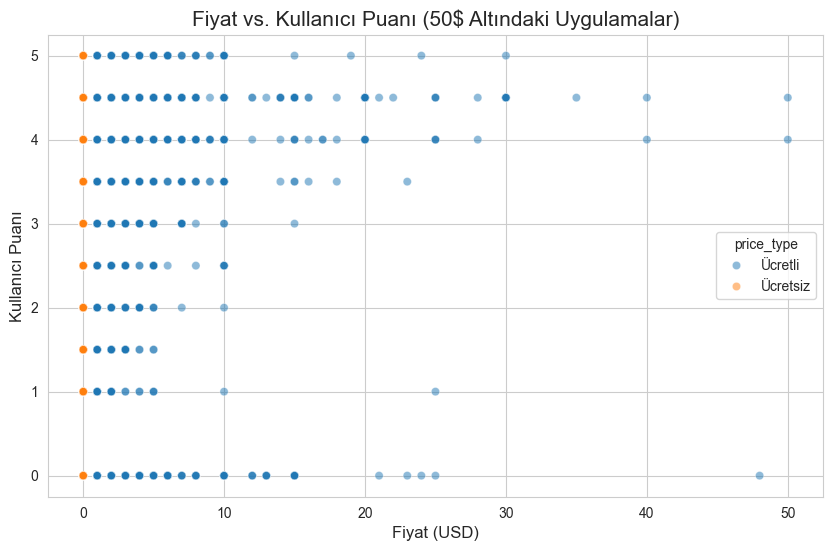

In [11]:
# 50 doların altındaki uygulamalar için Fiyat ve Kullanıcı Puanı ilişkisini gösteren bir Saçılım Grafiği
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='user_rating', data=df[df['price'] < 50], alpha=0.5, hue='price_type')
plt.title('Fiyat vs. Kullanıcı Puanı (50$ Altındaki Uygulamalar)', fontsize=15)
plt.xlabel('Fiyat (USD)', fontsize=12)
plt.ylabel('Kullanıcı Puanı', fontsize=12)
plt.show()